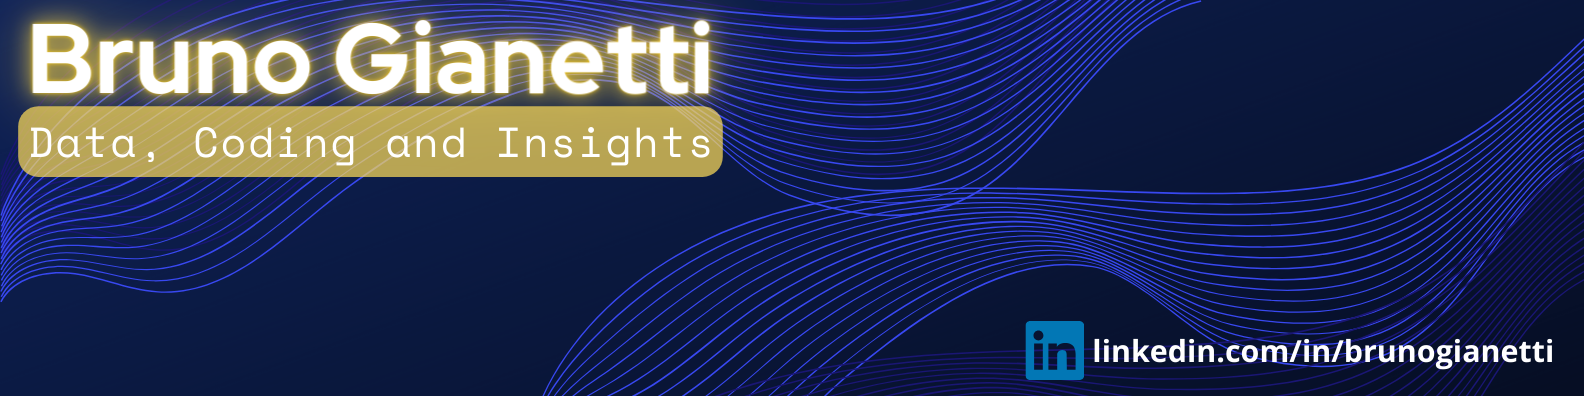

# Deep Learning: previsão com Keras

#### Trabalharemos com uma base de dados de passagens áreas com o intuito de prever o consumo de passagens aéreas no futuro.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'

passageiros = pd.read_csv(url)
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

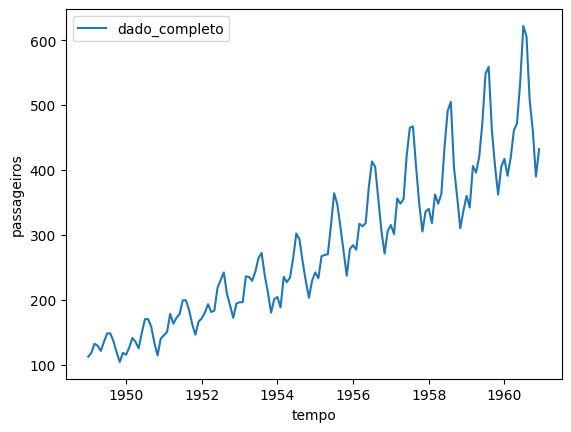

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data = passageiros, label='dado_completo')

In [ ]:
# Configurações do matplotlib
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

In [ ]:
# Escalando os dados
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [ ]:
dado_escalado = sc.transform(passageiros)

In [ ]:
# criando a entrada (X) e a saída (Y)
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

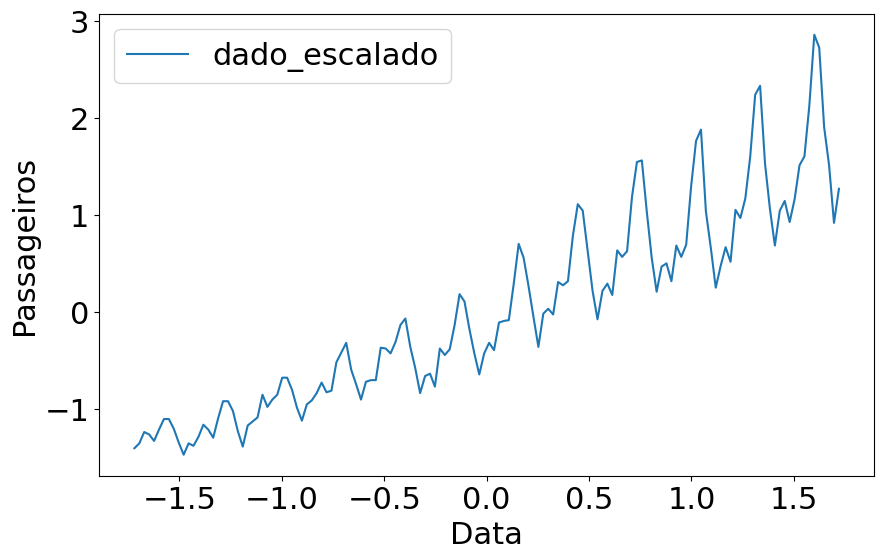

In [ ]:
# observe os valores nas escalas.
sns.lineplot(x=x, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [ ]:
# separando dados para treino e teste
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [ ]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [ ]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

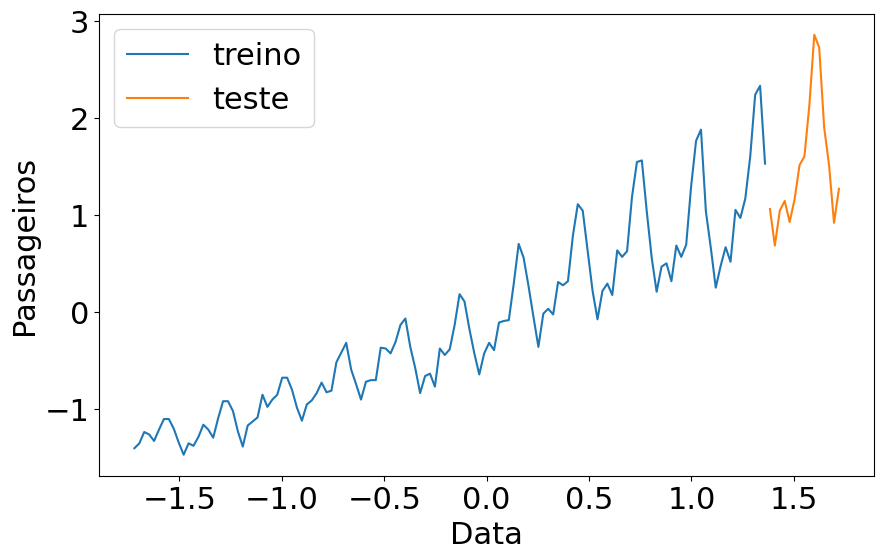

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(Dense(1, input_dim= 1, kernel_initializer= 'Ones', activation= 'linear', use_bias= False))

In [ ]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 4ms/step - loss: 0.1286


In [ ]:
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


<Axes: >

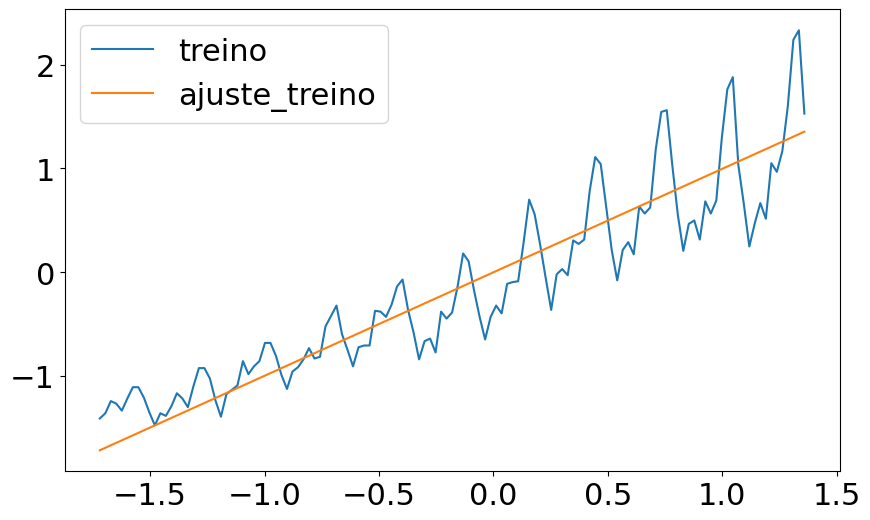

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

In [ ]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}

In [ ]:
resultados = pd.DataFrame(data=d)
resultados

,tempo,passageiros
0,-1.720064,-1.714222
1,-1.696007,-1.690247
2,-1.671950,-1.666272
3,-1.647894,-1.642297
4,-1.623837,-1.618322
...,...,...
124,1.262984,1.258695
125,1.287041,1.282670
126,1.311098,1.306645
127,1.335155,1.330620


In [ ]:
# Escalonando os dados
resultado_escalonado = sc.inverse_transform(resultados)

In [ ]:
resultado_escalonado = pd.DataFrame(resultado_escalonado)
resultado_escalonado.columns = ['tempo', 'passageiros']
resultado_escalonado

,tempo,passageiros
0,1949.000000,75.364991
1,1949.083333,78.231195
2,1949.166667,81.097414
3,1949.250000,83.963604
4,1949.333333,86.829822
...,...,...
124,1959.333333,430.774336
125,1959.416667,433.640554
126,1959.500000,436.506759
127,1959.583333,439.372949


<Axes: xlabel='tempo', ylabel='passageiros'>

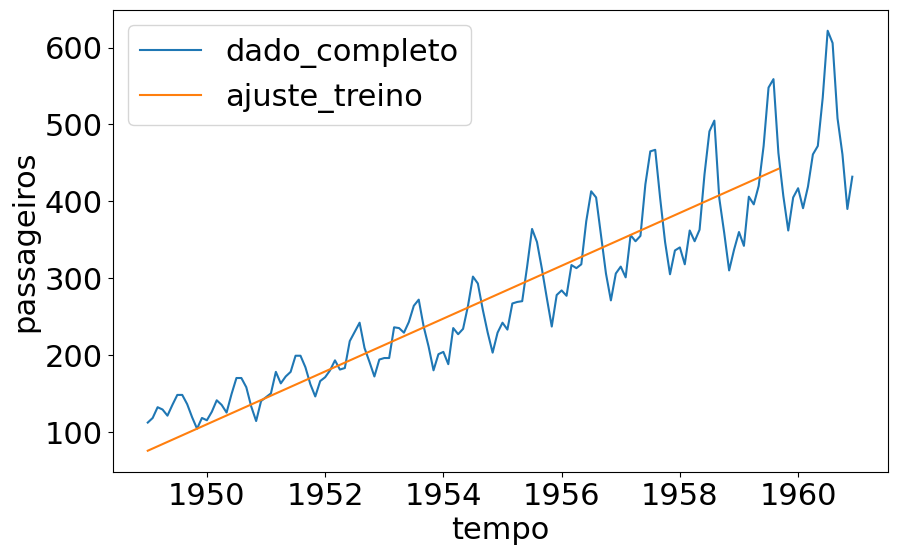

In [ ]:
sns.lineplot(x= 'tempo', y = 'passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_escalonado, label='ajuste_treino')

In [ ]:
y_predict_teste = regressor.predict(xteste)

1/1 [==============================] - 0s 21ms/step


In [ ]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)
resultados_teste

,tempo,passageiros
0,1.383268,1.378570
1,1.407325,1.402545
2,1.431382,1.426520
3,1.455439,1.450496
4,1.479496,1.474471
5,1.503553,1.498446
6,1.527609,1.522421
7,1.551666,1.546396
8,1.575723,1.570371
9,1.599780,1.594347


In [ ]:
resultado_escalonado_teste = sc.inverse_transform(resultados_teste)
resultado_escalonado_teste = pd.DataFrame(resultado_escalonado_teste)
resultado_escalonado_teste.columns = ['tempo', 'passageiros']
resultado_escalonado_teste

,tempo,passageiros
0,1959.750000,445.105357
1,1959.833333,447.971576
2,1959.916667,450.837766
3,1960.000000,453.703970
4,1960.083333,456.570188
5,1960.166667,459.436378
6,1960.250000,462.302597
7,1960.333333,465.168787
8,1960.416667,468.034991
9,1960.500000,470.901210


<Axes: xlabel='tempo', ylabel='passageiros'>

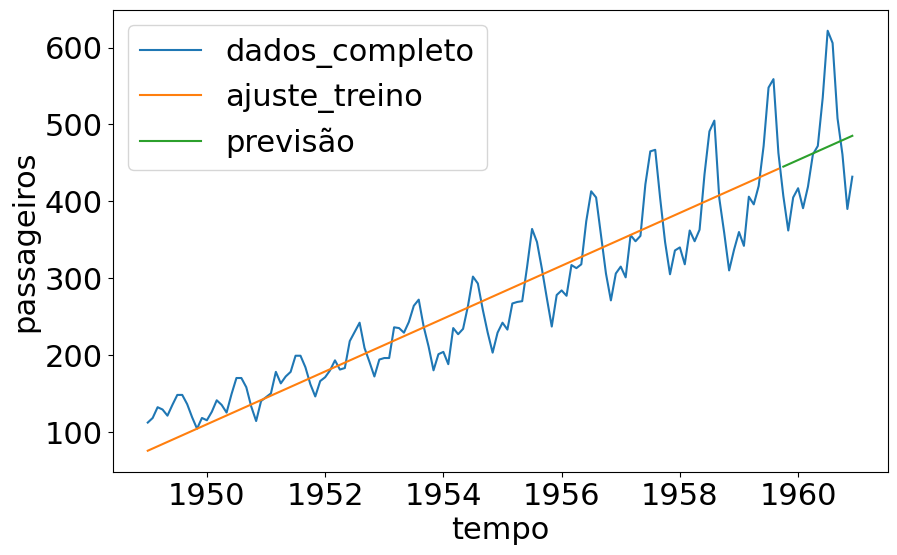

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dados_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_escalonado, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_escalonado_teste, label='previsão')

In [ ]:
regressor2 = Sequential()
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [ ]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 0.8092
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8085
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8077
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8065
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8049
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8025
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7993
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7947
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7889
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7812
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7717
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7600
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

In [ ]:
y_predict = regressor2.predict(xtreino)

5/5 [==============================] - 0s 3ms/step


In [ ]:
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 21ms/step


<Axes: >

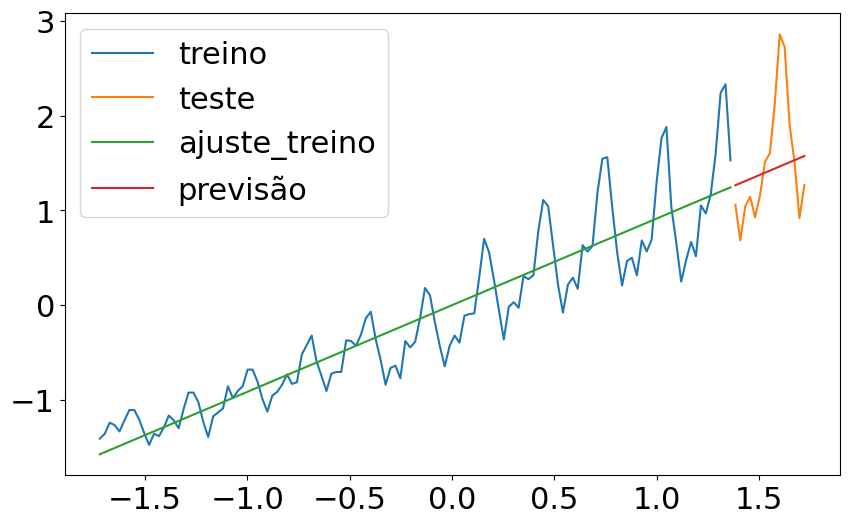

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')

In [ ]:
# Alteramos a ativação
regressor2 = Sequential()
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor2.compile(loss='mean_squared_error', optimizer='adam')

regressor2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 8)                 64        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor2.fit(xtreino, ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7983
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7960
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7942
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7922
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7918
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7915
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7908
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7892
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7877
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7866
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7864
Epoch 12/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7865
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [ ]:
y_predict = regressor2.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 20ms/step


<Axes: >

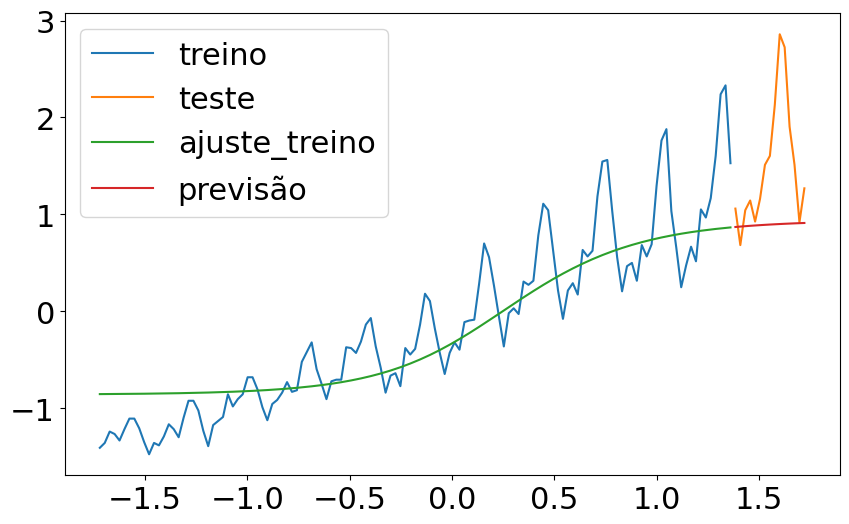

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
import numpy as np

In [ ]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])

  X_novo, y_novo = np.array(X_novo), np.array(y_novo)

  return X_novo, y_novo

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [ ]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [ ]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [ ]:
regressor3 = Sequential()
regressor3.add(Dense(8, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))
regressor3.add(Dense(64,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1,kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [ ]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7681
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7433
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7191
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6990
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6775
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6525
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6274
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6009
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5739
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5412
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5063
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4716
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [ ]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 [==============================] - 0s 4ms/step


<Axes: xlabel='tempo', ylabel='0'>

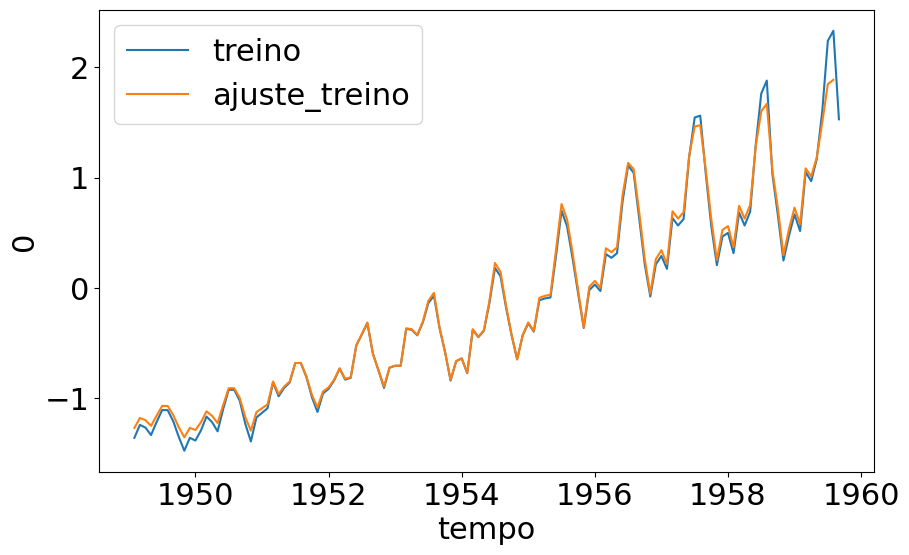

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [ ]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 51ms/step


In [ ]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

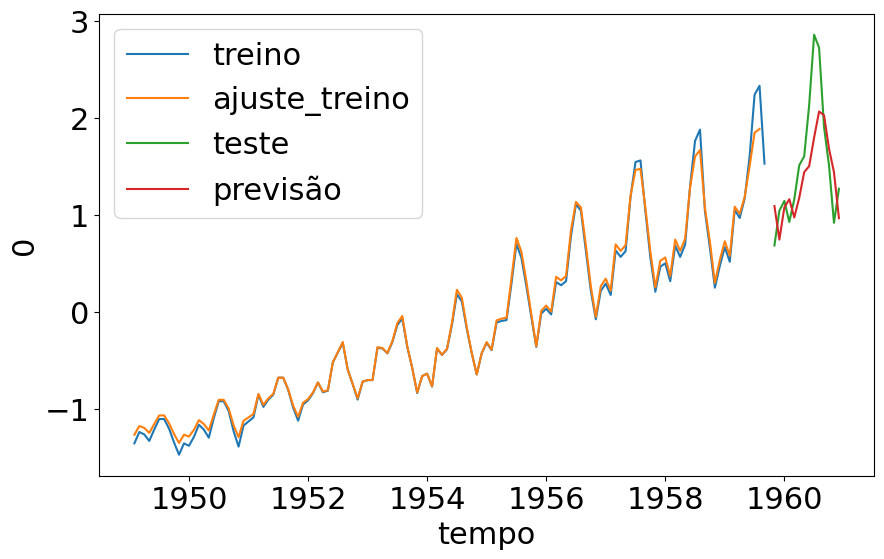

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão')

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4)

In [ ]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [ ]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 4)

In [ ]:
regressor4 = Sequential()
regressor4.add(Dense(8, input_dim=4, kernel_initializer='Ones', activation='linear', use_bias=False))
regressor4.add(Dense(64,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1,kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [ ]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 3ms/step - loss: 0.8681
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7293
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6429
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5753
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5170
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4654
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4087
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3545
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3068
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2586
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2199
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1906
Epoch 13/300
4/4 [==============================] - 0s 3ms/st

In [ ]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 45ms/step


In [ ]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [ ]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo'>

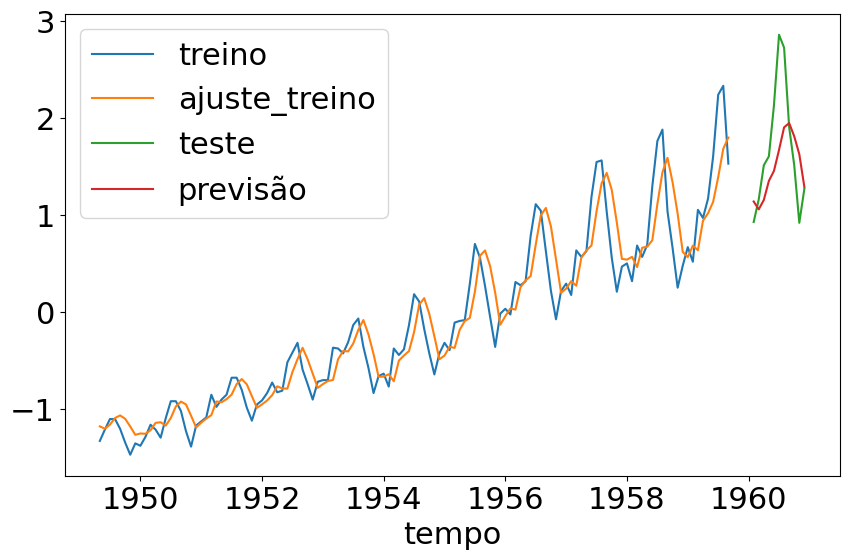

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsão')

# Outro problema a ser explorado

## Bicicletas

In [ ]:
bike = pd.read_csv('bicicletas.csv')

In [ ]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
# conversão de datas
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

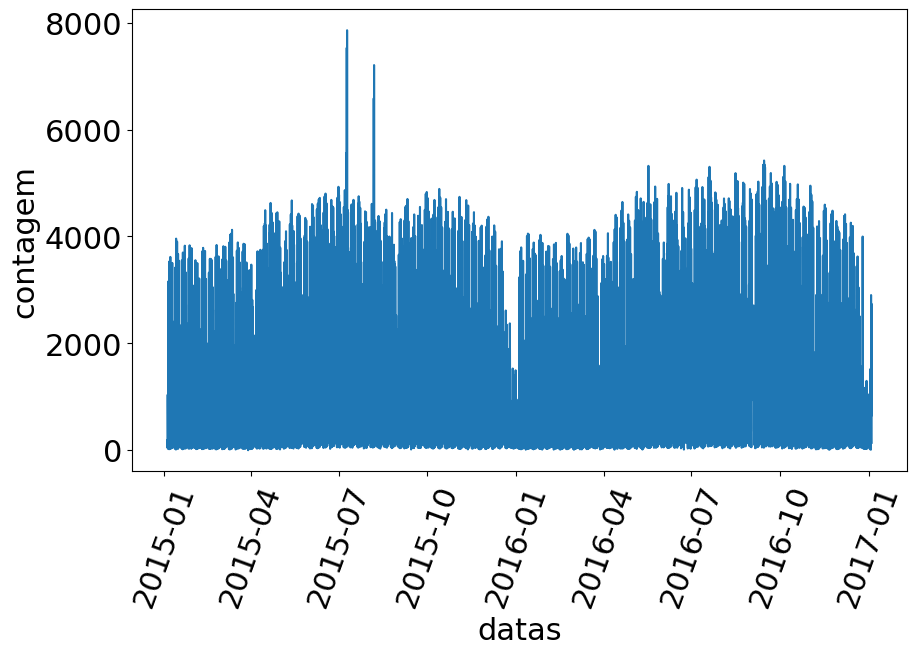

In [ ]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [ ]:
# escalonando os dados
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [ ]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [ ]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [ ]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

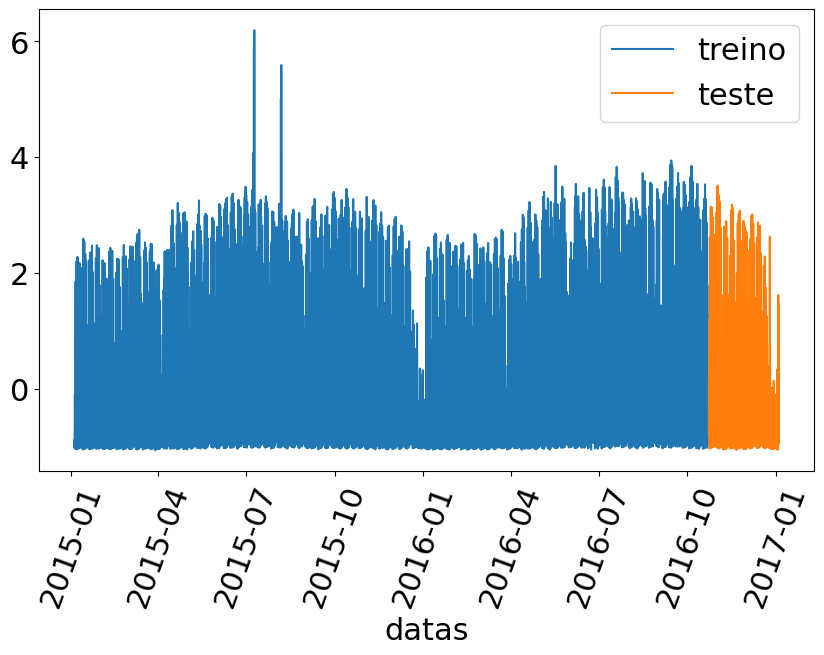

In [ ]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [ ]:
# visualização dos dados
xtreino_novo[0]

array([-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
       -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553])

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

In [ ]:
xtreino_novo = xtreino_novo.reshape(xtreino_novo.shape[0], xtreino_novo.shape[1], 1)

In [ ]:
xteste_novo = xteste_novo.reshape(xteste_novo.shape[0], xteste_novo.shape[1], 1)

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
recorrente = Sequential()

In [ ]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [ ]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [ ]:
recorrente.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo,
                           validation_data=(xteste_novo, yteste_novo),
                           epochs = 100)

Epoch 1/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0783 - val_loss: 0.0413
Epoch 2/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0563 - val_loss: 0.0332
Epoch 3/100
490/490 [==============================] - 8s 15ms/step - loss: 0.0483 - val_loss: 0.0295
Epoch 4/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0441 - val_loss: 0.0428
Epoch 5/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0411 - val_loss: 0.0293
Epoch 6/100
490/490 [==============================] - 7s 15ms/step - loss: 0.0387 - val_loss: 0.0258
Epoch 7/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0370 - val_loss: 0.0269
Epoch 8/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0357 - val_loss: 0.0346
Epoch 9/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0344 - val_loss: 0.0220
Epoch 10/100
490/490 [==============================] - 8s 17ms/step - loss: 0.033

In [97]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 4s 6ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

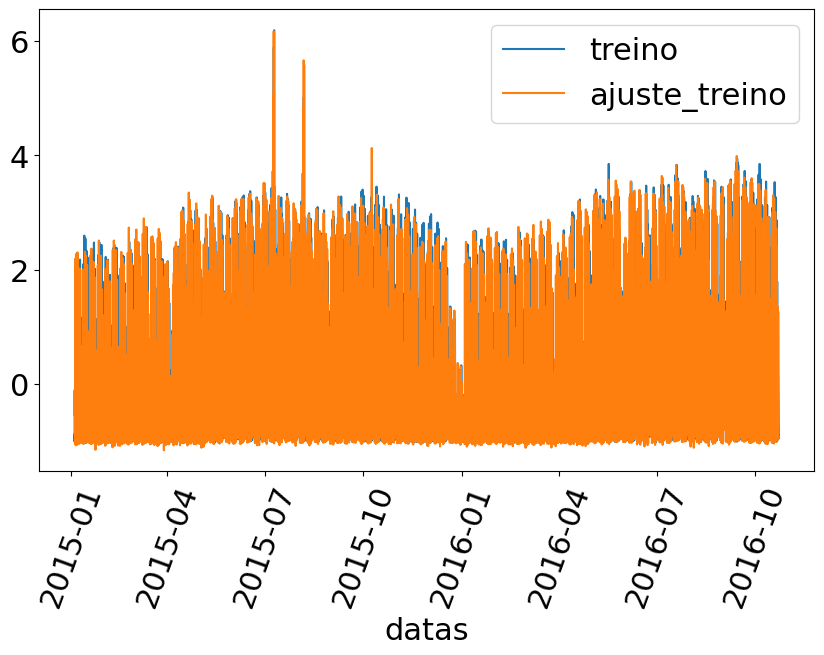

In [99]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[0:15662], label='ajuste_treino')
plt.xticks(rotation=70)

In [100]:
y_predito = recorrente.predict(xteste_novo)

55/55 [==============================] - 0s 6ms/step


<Axes: xlabel='datas'>

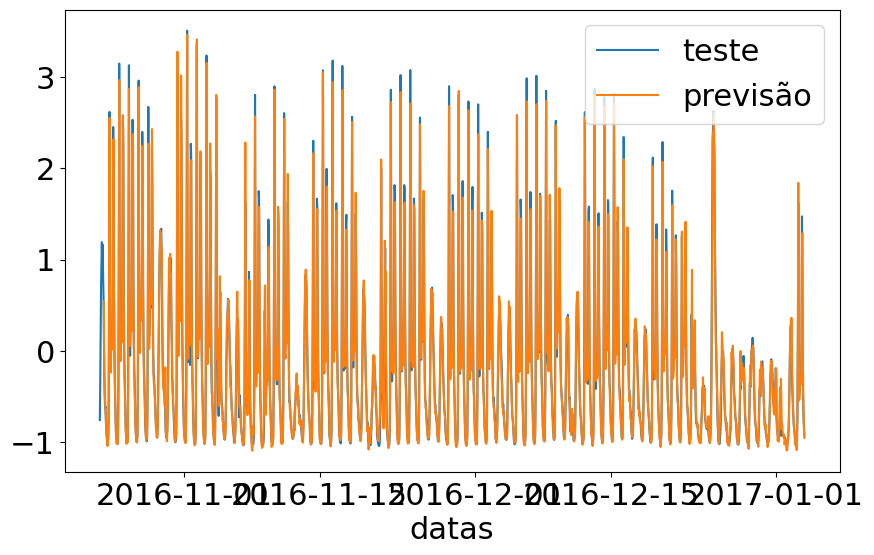

In [101]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsão')

In [102]:
from tensorflow.keras.layers import GRU

In [103]:
recorrente_g = Sequential()
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [104]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [106]:
recorrente.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
recorrente_g.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo,
                              validation_data=(xteste_novo, yteste_novo),
                              epochs=100)

Epoch 1/100
490/490 [==============================] - 9s 15ms/step - loss: 0.2341 - val_loss: 0.0684
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0709 - val_loss: 0.0330
Epoch 3/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0510 - val_loss: 0.0346
Epoch 4/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0426 - val_loss: 0.0331
Epoch 5/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0387 - val_loss: 0.0276
Epoch 6/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0363 - val_loss: 0.0324
Epoch 7/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0348 - val_loss: 0.0222
Epoch 8/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0333 - val_loss: 0.0227
Epoch 9/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0324 - val_loss: 0.0213
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.031

In [108]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 1s 4ms/step


<Axes: xlabel='datas'>

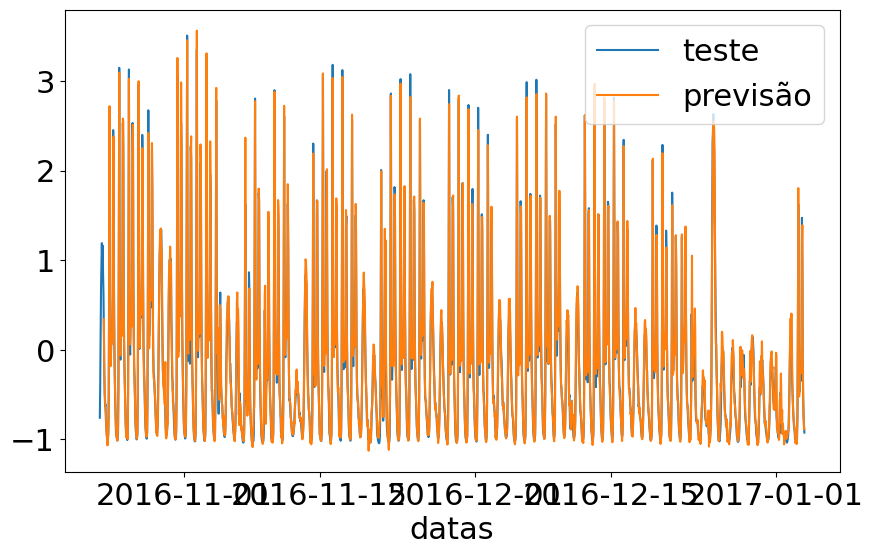

In [109]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsão')

In [110]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


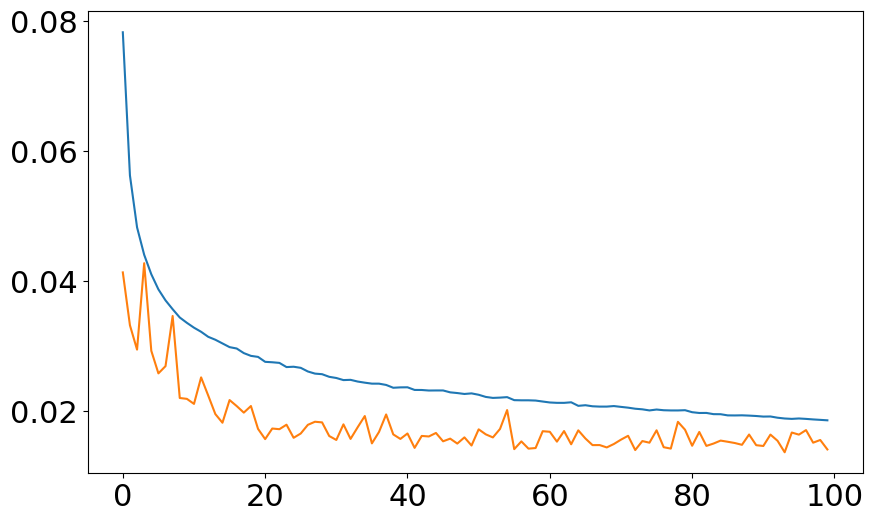

In [111]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])

Text(0, 0.5, 'Custo')

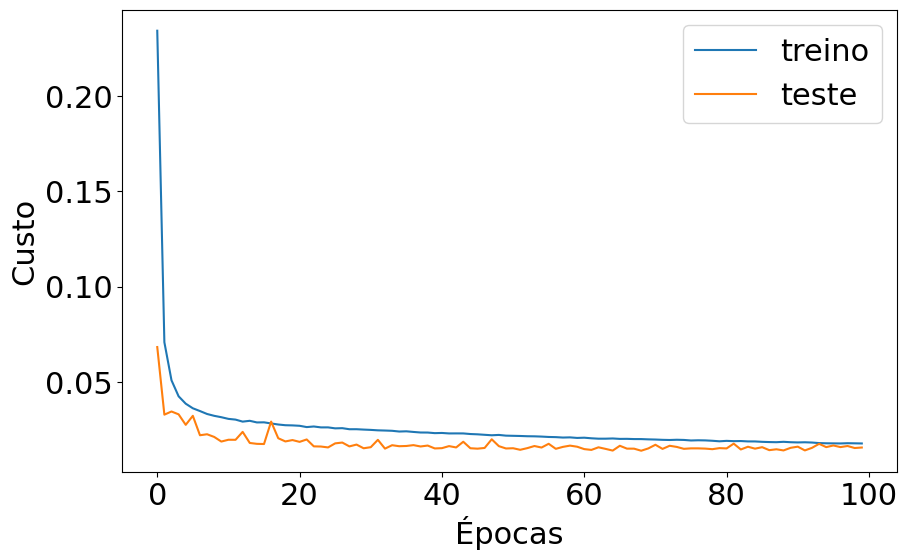

In [112]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')